In [1]:
import numpy as np 
import matplotlib.pyplot as plt

$L_1 = |W_1| + |W_2|$

In [3]:
# 定义一个方程，用来进行L1正则化对损失函数的影响 求出最小值
f(x, y) = |x| + |y|

SyntaxError: invalid syntax (Temp/ipykernel_14784/1554726699.py, line 2)

### 曼哈顿距离  L1正则化  也称为套索回归

$L_1  =  \alpha * \sum\limits_{i = 1}^n|w_i|$

Lasso回归和线性回归相比，多了一项：$-\eta * \alpha * sgn(w_i)$

权重更新公式为： 梯度下降-学习率乘以套索回归的系数再乘以$w_i$

$w_i$为正数时，$sgn(w_i)$等于1 直接减去 $\eta * \alpha$ （大于0），所以正的 $w_i$ 变小了

当$w_i$为负时候  $sgn(w_i) = -1$，相当于直接加上 $\eta * \alpha$ （大于0），所以负的 $w_i$​ 变大了，绝对值变小，向0靠近

$\theta_j^{n + 1} = \theta_j^{n} -\eta\sum\limits_{i = 1}^{n} (h_{\theta}(x^{(i)}) - y^{(i)} )x_j^{(i)} - \eta*\alpha * sgn(w_i)$

$\eta $ 大于零，表示梯度下降学习率

$\alpha$ 大于零，表示L1正则化系数

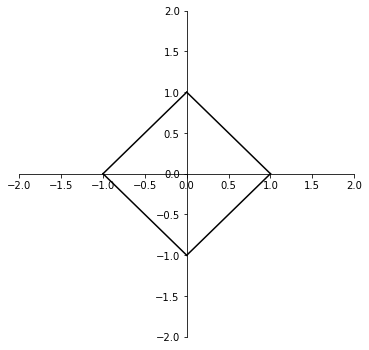

In [2]:
# 求出最小值，令f(x, y) = 0
# |x| + |y| = 0
# |x| + |y| = 1
#  ① 假设,x和y都是大于0的数 那么方程可以写为
# y = - x
# y = 1-x

# 根据这个方程定义一个匿名函数
fun1 = lambda x: 1-x

# 根据这个方程画出图形
x1 = np.linspace(0, 1, 50)
y1 = fun1(x1)
plt.figure(figsize=(6,6))
plt.plot(x1, y1, color='k')
plt.xlim(-2, 2)
plt.ylim(-2 ,2)
# 获取当前视图
ax = plt.gca()
# 将图形右边和顶部的颜色设置为None,隐藏
ax.spines['right'].set_color('None')
ax.spines['top'].set_color('None')
# 移动顶部的位置
ax.spines['bottom'].set_position(('data', 0))
# 移动左边的位置
ax.spines['left'].set_position(('data', 0))

# ② 假设x, y小于0
# 方程可以写为 1 = -x -y 
fun2 = lambda x: -x - 1
x2 = np.linspace(-1, 0, 50)
y2=fun2(x2)
plt.plot(x2, y2, color='k')

# ③ 假设x大于0， y小于0  1 = x -y 
fun3 = lambda x: x- 1
x3 = np.linspace(0, 1, 50)
y3 = fun3(x3)
plt.plot(x3, y3, color='k')

# ④ 假设x小于0，y大于0 1= -x + y  y = 1 + x
fun4 = lambda x : 1 + x
x4 = np.linspace(-1, 0, 50)
y4 = fun4(x4)
plt.plot(x4, y4, color='k')
plt.show()

### L2正则化 也称为岭回归

$L_2 = \alpha * \sum\limits_{i = 1}^n(w_i)^2$ 

1 = $\alpha(x^2+y^2)$

$1 = x^2 + y^2$

$y = \pm \sqrt{1-x^2}$

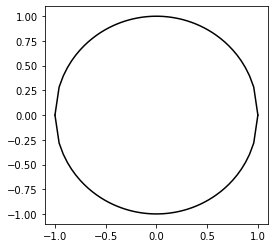

In [3]:
fun = lambda x : (1- x**2)**0.5
x = np.linspace(-1, 1 , 50)
y1 = fun(x)
y2 = -fun(x)
plt.figure(figsize=(4, 4))
plt.plot(x, y1, color='k')
plt.plot(x, y2, color='k')

## Ridge岭回归  L2

In [4]:
from sklearn.linear_model import Ridge  # 岭回归
from sklearn.linear_model import SGDRegressor, LinearRegression  # 随机梯度下降和线性回归

In [6]:
X = 2 * np.random.rand(100, 5)
w = np.random.randint(1, 10, size=(5, 1))
b = np.random.randint(1, 10, size=1)
y = X.dot(w) + b + np.random.randn(100, 1)
display(X.shape, y.shape)

(100, 5)

(100, 1)

In [7]:
# alpha：系数  solver：指定梯度下降的方式，sag代表随机梯度下降
ridge = Ridge(alpha=1, solver='sag')
ridge.fit(X, y)

Ridge(alpha=1, solver='sag')

In [8]:
print(ridge.coef_)  # 系数
print(ridge.intercept_)  # 截距

[[7.71307171 1.08801717 6.90320882 8.60295904 7.51569635]]
[8.12421412]


In [9]:
print('真实\n', w, b)

真实
 [[8]
 [1]
 [7]
 [9]
 [8]] [7]


## 随机梯度下降

In [13]:
# penalty:惩罚项 L1和L2  alpha:正则项的强度  l1_ratio:
sgd = SGDRegressor(penalty='l2', alpha=0)
sgd.fit(X, y.ravel())

SGDRegressor(alpha=0)

In [14]:
print(sgd.coef_)
print(sgd.intercept_)

[7.87171156 1.36211599 7.16213324 8.92048425 7.88539033]
[6.70562768]


## 线性回归 使用正规方程

In [15]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [16]:
print(model.coef_)
print(model.intercept_)

[[7.99165166 1.16141586 7.08549893 8.90642664 7.78634816]]
[7.0312342]


## Lasso 套索回归  

具有稀松性质，一部分系数可以为0

In [17]:
from sklearn.linear_model import Lasso
X = 2 * np.random.rand(100, 20)
w = np.random.randn(20, 1)
b = np.random.randint(1, 10, size=1)
y = X.dot(w) + b + np.random.randn(100, 1)
display(X.shape, y.shape)

(100, 20)

(100, 1)

In [19]:
lasson = Lasso(alpha=0.5)
lasson.fit(X, y)

Lasso(alpha=0.5)

In [20]:
print(lasson.coef_)
print(lasson.intercept_)

[-0.          0.          0.         -0.         -0.          0.
  0.          0.         -0.          0.          0.          0.
 -0.         -0.          0.         -0.          0.          0.
  0.         -0.79274709]
[7.59146122]


In [21]:
sgd = SGDRegressor(penalty='l1', alpha=0)
# sgd.fit(X,y.reshape(-1))
sgd.fit(X, y.ravel())  # ravel将维度变为1维

SGDRegressor(alpha=0, penalty='l1')

In [22]:
print(sgd.coef_)
print(sgd.intercept_)

[ 0.1861978   0.8559213  -0.06664567 -0.70346683 -0.04187249  0.1042654
  0.76133961  0.93755158 -1.11532038  0.56593975  0.73799168  0.80740952
  0.62653767 -0.98944841  0.82918805  0.08360654  1.17215485  1.50639286
  0.93354937 -1.39577222]
[1.14236014]


## ElasticNe(弹性网络) 

弹性网络是L1正则化和L2正则化的结合

In [23]:
import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor

# 1、创建数据集X，y
X = 2*np.random.rand(100, 20)
w = np.random.randn(20,1)
b = np.random.randint(1,10,size = 1)
y = X.dot(w) + b + np.random.randn(100, 1)

print('原始方程的斜率：',w.ravel())
print('原始方程的截距：',b)

model = ElasticNet(alpha= 1, l1_ratio = 0.7)
model.fit(X, y)
print('弹性网络回归求解的斜率：',model.coef_)
print('弹性网络回归求解的截距：',model.intercept_)

# 线性回归梯度下降方法
sgd = SGDRegressor(penalty='l2',alpha=0, l1_ratio=0)
sgd.fit(X, y.reshape(-1,))
print('随机梯度下降求解的斜率是：',sgd.coef_)
print('随机梯度下降求解的截距是：',sgd.intercept_)

原始方程的斜率： [ 1.13466099  0.57028625 -0.30657444 -1.1848157   0.10392322 -0.16179904
  1.57634966 -0.52154945 -3.25711513  0.46539007 -0.94620383 -0.82725412
 -0.04790477  0.34396862  2.50711073 -0.24171961 -1.61941062 -0.08558289
 -1.46699519  0.88489859]
原始方程的截距： [1]
弹性网络回归求解的斜率： [ 0.          0.         -0.          0.          0.          0.
  0.         -0.         -0.45470449 -0.         -0.         -0.
 -0.          0.          0.30060409 -0.         -0.         -0.
 -0.          0.        ]
弹性网络回归求解的截距： [-1.73161011]
随机梯度下降求解的斜率是： [ 1.12212966  0.53650451 -0.38419184 -0.37988166  0.19117013  0.17401681
  1.30712168 -0.57639437 -2.9298498   0.27104318 -1.37714176 -0.7196402
  0.08035362  0.50219471  2.52358315 -0.22434869 -1.462242   -0.08228272
 -1.27888037  0.59154203]
随机梯度下降求解的截距是： [0.07601584]
